In [192]:
import pandas as pd
import numpy as np

# Load Dataset

In [193]:
#dataset_url = "https://raw.githubusercontent.com/Agnes4Him/project-datasets/refs/heads/main/smart_home_energy_consumption_large.csv"
dataset_url = "../data/capstone/smart_home_energy_consumption_large.csv"

In [194]:
df = pd.read_csv(dataset_url)

df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


# Exploratory Data Analysis

In [195]:
df.shape

(100000, 8)

In [196]:
df.columns

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size'],
      dtype='object')

In [197]:
df.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

In [198]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[()]", "", regex=True)
      .str.replace(r"\s+", "_", regex=True)
)

df.columns

Index(['home_id', 'appliance_type', 'energy_consumption_kwh', 'time', 'date',
       'outdoor_temperature_°c', 'season', 'household_size'],
      dtype='object')

In [199]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature_°c,season,household_size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [200]:
df.isnull().sum()

home_id                   0
appliance_type            0
energy_consumption_kwh    0
time                      0
date                      0
outdoor_temperature_°c    0
season                    0
household_size            0
dtype: int64

In [201]:
df.describe().round()

,home_id,energy_consumption_kwh,outdoor_temperature_°c,household_size
count,100000.0,100000.0,100000.0,100000.0
mean,250.0,1.0,15.0,3.0
std,144.0,1.0,14.0,1.0
min,1.0,0.0,-10.0,1.0
25%,125.0,1.0,2.0,2.0
50%,250.0,1.0,15.0,3.0
75%,375.0,2.0,27.0,4.0
max,500.0,5.0,40.0,5.0


In [202]:
df.appliance_type.value_counts()

appliance_type
Lights              10201
Dishwasher          10095
Air Conditioning    10067
Heater              10018
Washing Machine      9953
Microwave            9947
Computer             9944
Oven                 9939
Fridge               9931
TV                   9905
Name: count, dtype: int64

In [203]:
df.season.value_counts()

season
Spring    25112
Fall      25026
Summer    24966
Winter    24896
Name: count, dtype: int64

In [204]:
df.duplicated().any()

np.False_

In [205]:
df[df.duplicated()]

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature_°c,season,household_size


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='energy_consumption_kwh', ylabel='Count'>

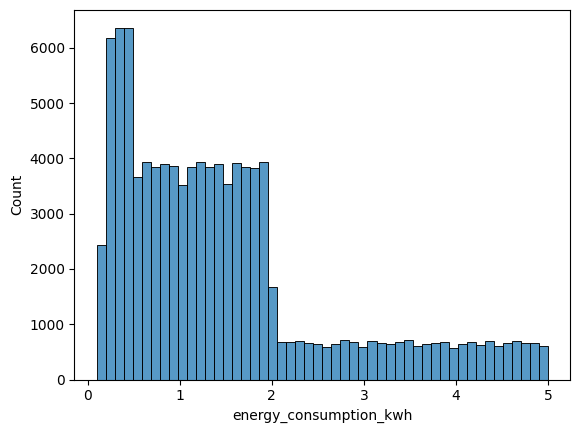

In [207]:
sns.histplot(df.energy_consumption_kwh, bins=50)

In [208]:
df["energy_consumption_kwh"].skew()

np.float64(1.2397544707469879)

In [209]:
# Due to skewness, consider these models for training - RandomForest, Decision Trees, XGBoost

# Feature Engineering

In [210]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["time"] = pd.to_datetime(df["time"], format="%H:%M")

In [211]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature_°c,season,household_size
0,94,Fridge,0.20,1900-01-01 21:12:00,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,1900-01-01 20:11:00,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,1900-01-01 06:39:00,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,1900-01-01 21:56:00,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,1900-01-01 04:31:00,2023-08-26,34.5,Summer,5


In [212]:
df.dtypes

home_id                            int64
appliance_type                    object
energy_consumption_kwh           float64
time                      datetime64[ns]
date                      datetime64[ns]
outdoor_temperature_°c           float64
season                            object
household_size                     int64
dtype: object

In [213]:
df["timestamp"] = pd.to_datetime(
    df["date"].dt.strftime("%Y-%m-%d") + " " + df["time"].dt.strftime("%H:%M")
)

In [214]:
df.drop(columns=["date", "time"], inplace=True)

In [215]:
df.dtypes

home_id                            int64
appliance_type                    object
energy_consumption_kwh           float64
outdoor_temperature_°c           float64
season                            object
household_size                     int64
timestamp                 datetime64[ns]
dtype: object

In [216]:
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

In [217]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,timestamp,hour,minute,day_of_week,day,month,is_weekend
0,94,Fridge,0.20,-1.0,Fall,2,2023-12-02 21:12:00,21,12,5,2,12,1
1,435,Oven,0.23,31.1,Summer,5,2023-08-06 20:11:00,20,11,6,6,8,1
2,466,Dishwasher,0.32,21.3,Fall,3,2023-11-21 06:39:00,6,39,1,21,11,0
3,496,Heater,3.92,-4.2,Winter,1,2023-01-21 21:56:00,21,56,5,21,1,1
4,137,Microwave,0.44,34.5,Summer,5,2023-08-26 04:31:00,4,31,5,26,8,1


In [218]:
df.drop(columns=["timestamp"], inplace=True)

In [219]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,hour,minute,day_of_week,day,month,is_weekend
0,94,Fridge,0.20,-1.0,Fall,2,21,12,5,2,12,1
1,435,Oven,0.23,31.1,Summer,5,20,11,6,6,8,1
2,466,Dishwasher,0.32,21.3,Fall,3,6,39,1,21,11,0
3,496,Heater,3.92,-4.2,Winter,1,21,56,5,21,1,1
4,137,Microwave,0.44,34.5,Summer,5,4,31,5,26,8,1


In [220]:
df.dtypes

home_id                     int64
appliance_type             object
energy_consumption_kwh    float64
outdoor_temperature_°c    float64
season                     object
household_size              int64
hour                        int32
minute                      int32
day_of_week                 int32
day                         int32
month                       int32
is_weekend                  int64
dtype: object

In [221]:
df.describe()

,home_id,energy_consumption_kwh,outdoor_temperature_°c,household_size,hour,minute,day_of_week,day,month,is_weekend
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770,11.486460,29.484360,3.009970,15.674070,6.494090,0.289050
std,144.435367,1.181176,14.438755,1.417077,6.925759,17.301538,2.007837,8.791428,3.449386,0.453323
min,1.000000,0.100000,-10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,125.000000,0.590000,2.400000,2.000000,5.000000,15.000000,1.000000,8.000000,4.000000,0.000000
50%,250.000000,1.230000,14.900000,3.000000,11.000000,29.000000,3.000000,16.000000,6.000000,0.000000
75%,375.000000,1.870000,27.400000,4.000000,18.000000,44.000000,5.000000,23.000000,10.000000,1.000000
max,500.000000,5.000000,40.000000,5.000000,23.000000,59.000000,6.000000,31.000000,12.000000,1.000000


# Feature Importance

In [222]:
df.columns

Index(['home_id', 'appliance_type', 'energy_consumption_kwh',
       'outdoor_temperature_°c', 'season', 'household_size', 'hour', 'minute',
       'day_of_week', 'day', 'month', 'is_weekend'],
      dtype='object')

In [223]:
numerical = [
    "outdoor_temperature_°c", 
    "household_size", 
    "hour", 
    #"minute", 
    "day_of_week", 
    "day", "month", 
    "is_weekend"]

categorical = ["appliance_type", "season"]

In [224]:
df[numerical].corrwith(df["energy_consumption_kwh"]).abs().sort_values(ascending=False)

household_size            0.006501
day                       0.004980
hour                      0.003861
day_of_week               0.003564
outdoor_temperature_°c    0.001995
month                     0.001908
is_weekend                0.000807
dtype: float64

# Split Data

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(60000, 20000, 20000)

In [227]:
df_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,hour,minute,day_of_week,day,month,is_weekend
42684,169,Heater,2.42,27.1,Fall,4,18,23,3,14,12,0
42131,311,Fridge,0.48,33.4,Spring,3,21,5,5,27,5,1
84494,330,Computer,0.64,-0.5,Fall,2,6,26,5,4,11,1
43194,182,Air Conditioning,2.01,18.4,Fall,5,10,53,4,27,10,0
10394,432,Fridge,0.22,-2.4,Fall,1,0,47,1,10,10,0


In [228]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,hour,minute,day_of_week,day,month,is_weekend
0,169,Heater,2.42,27.1,Fall,4,18,23,3,14,12,0
1,311,Fridge,0.48,33.4,Spring,3,21,5,5,27,5,1
2,330,Computer,0.64,-0.5,Fall,2,6,26,5,4,11,1
3,182,Air Conditioning,2.01,18.4,Fall,5,10,53,4,27,10,0
4,432,Fridge,0.22,-2.4,Fall,1,0,47,1,10,10,0


In [229]:
df_full_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,hour,minute,day_of_week,day,month,is_weekend
78689,91,Heater,2.46,34.5,Summer,4,2,26,6,23,7,1
76423,24,Air Conditioning,4.72,21.5,Fall,4,9,41,0,20,11,0
86945,495,Lights,0.64,-9.2,Spring,2,12,14,1,4,4,0
57427,484,Dishwasher,0.22,34.4,Fall,5,9,47,3,30,11,0
34616,200,Dishwasher,1.80,-5.4,Spring,3,1,2,0,1,5,0


In [230]:
y_train = df_train["energy_consumption_kwh"].values
y_val = df_val["energy_consumption_kwh"].values
y_test = df_test["energy_consumption_kwh"].values

del df_train["energy_consumption_kwh"]
del df_val["energy_consumption_kwh"]
del df_test["energy_consumption_kwh"]

# One Hot Encoding

In [231]:
from sklearn.feature_extraction import DictVectorizer

In [232]:
dv = DictVectorizer()

In [233]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
val_dict = df_val[categorical + numerical].to_dict(orient="records")
test_dict = df_test[categorical + numerical].to_dict(orient="records")

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

# Train a Decison Tree Model

In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

In [42]:
dt = DecisionTreeRegressor()

In [43]:
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [44]:
y_pred = dt.predict(X_val)

In [45]:
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.8375566391295576

In [46]:
def train_dt(max_depth, min_samples_leaf):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    return rmse

In [47]:
scores = []
depths = [3, 5, 7, 10]
samples_leaf = [1, 5, 10, 15, 20, 500, 100, 200]

for depth in depths:
    for s in samples_leaf:
        rmse = train_dt(depth, s)
        scores.append((depth, s, rmse))

scores

[(3, 1, 0.5815804631107598),
 (3, 5, 0.5815804631107598),
 (3, 10, 0.5815804631107597),
 (3, 15, 0.5815804631107598),
 (3, 20, 0.5815804631107597),
 (3, 500, 0.5815462150670965),
 (3, 100, 0.5815804631107598),
 (3, 200, 0.581616209358165),
 (5, 1, 0.5828805326757547),
 (5, 5, 0.5828805326757547),
 (5, 10, 0.5828734690406184),
 (5, 15, 0.5830591665821778),
 (5, 20, 0.582858348491816),
 (5, 500, 0.5822211455951671),
 (5, 100, 0.5825507526355822),
 (5, 200, 0.5826256604792193),
 (7, 1, 0.5878425314197491),
 (7, 5, 0.5869280776302938),
 (7, 10, 0.5870012325839629),
 (7, 15, 0.5865470994008577),
 (7, 20, 0.5859857281663882),
 (7, 500, 0.5828635120567728),
 (7, 100, 0.5837080839346551),
 (7, 200, 0.5838567028717196),
 (10, 1, 0.5993396851076555),
 (10, 5, 0.5949123114044949),
 (10, 10, 0.5930802623405493),
 (10, 15, 0.5920505916010487),
 (10, 20, 0.5909964262474058),
 (10, 500, 0.5834988705050544),
 (10, 100, 0.5862714937208009),
 (10, 200, 0.5858009923122423)]

In [48]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [49]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth            3      5      7      10
min_samples_leaf                            
1                 0.582  0.583  0.588  0.599
5                 0.582  0.583  0.587  0.595
10                0.582  0.583  0.587  0.593
15                0.582  0.583  0.587  0.592
20                0.582  0.583  0.586  0.591
100               0.582  0.583  0.584  0.586
200               0.582  0.583  0.584  0.586
500               0.582  0.582  0.583  0.583

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

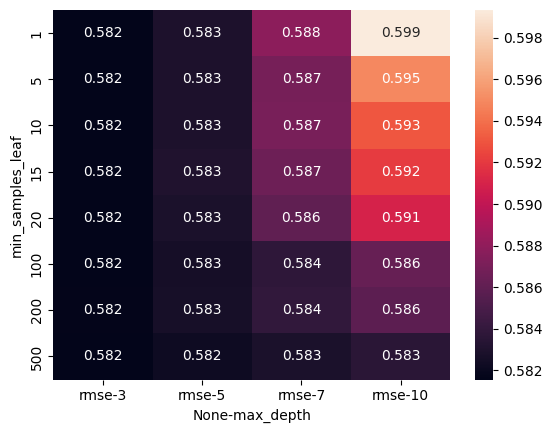

In [50]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [52]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_l

# Train a RandomForestRegressor

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_jobs=-1)

In [45]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [46]:
y_pred = rf.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.600304128928875

In [47]:
def train_rf(n_estimators, max_depth):
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=1, 
        n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    return rmse

In [52]:
scores = []
depths = [3, 5, 7, 10]
estimators = range(10, 201, 10)

for d in depths:
    for n in estimators:
        rmse = train_rf(n, d)

        scores.append((d, n, rmse))

/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` t

In [56]:
columns = ['max_depth', 'estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [57]:
df_scores_pivot = df_scores.pivot(index='estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth      3      5      7      10
estimators                            
10          0.581  0.582  0.583  0.586
20          0.581  0.582  0.583  0.585
30          0.581  0.582  0.582  0.584
40          0.581  0.582  0.582  0.584
50          0.581  0.582  0.582  0.584
60          0.581  0.582  0.582  0.584
70          0.581  0.582  0.582  0.584
80          0.581  0.582  0.582  0.584
90          0.581  0.582  0.582  0.584
100         0.581  0.582  0.582  0.584
110         0.581  0.582  0.582  0.584
120         0.581  0.582  0.582  0.584
130         0.581  0.582  0.582  0.584
140         0.581  0.582  0.582  0.584
150         0.581  0.582  0.582  0.584
160         0.581  0.582  0.582  0.583
170         0.581  0.582  0.582  0.584
180         0.581  0.582  0.582  0.584
190         0.581  0.582  0.582  0.583
200         0.581  0.582  0.582  0.583

<Axes: xlabel='None-max_depth', ylabel='estimators'>

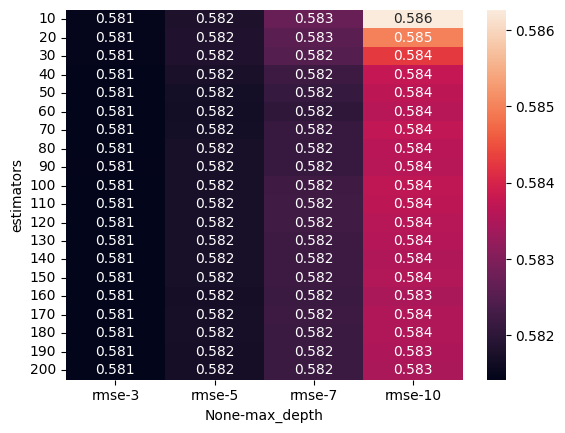

In [58]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [65]:
rf = RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=1, 
        n_jobs=-1)

rf.fit(X_train, y_train)

/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/agnes/Documents/personal/projects/machine-learning-zoomcamp/capstone-project/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` t

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at

# Train XGBoost

In [43]:
!uv add xgboost

Resolved 118 packages in 1ms
Audited 114 packages in 0.95ms


In [44]:
import xgboost as xgb

In [153]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [164]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [165]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

0.5841078496819305

In [51]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [52]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [53]:
s = output.stdout

In [54]:
print(s[:200])

[0]	train-rmse:0.92848	val-rmse:0.92503
[5]	train-rmse:0.59232	val-rmse:0.59510
[9]	train-rmse:0.57728	val-rmse:0.58411



In [55]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [56]:
df_score = parse_xgb_output(output)

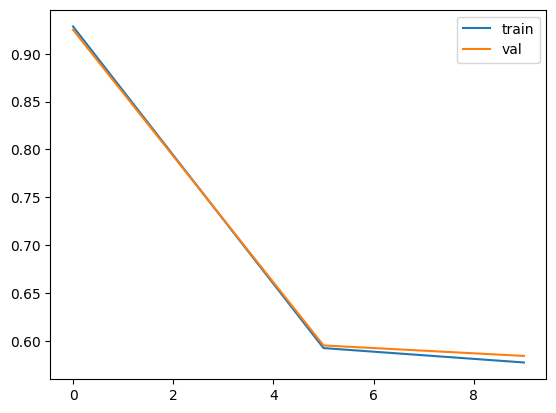

In [57]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

# XGBoost Parameter Tuning

In [ ]:
# eta, max_depth, min_child_weight

In [149]:
# ets
scores = {}

In [150]:
%%capture output
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [151]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

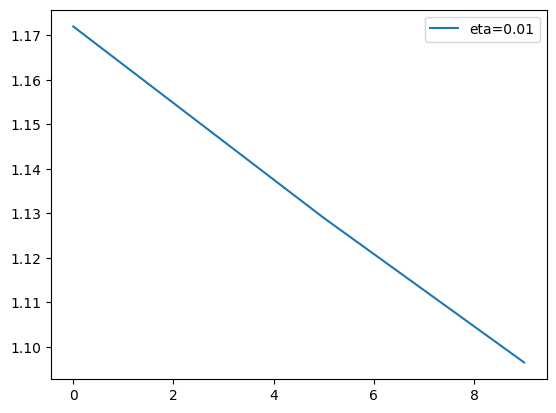

In [152]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    
plt.legend()

In [96]:
# max_depth
scores = {}

In [97]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

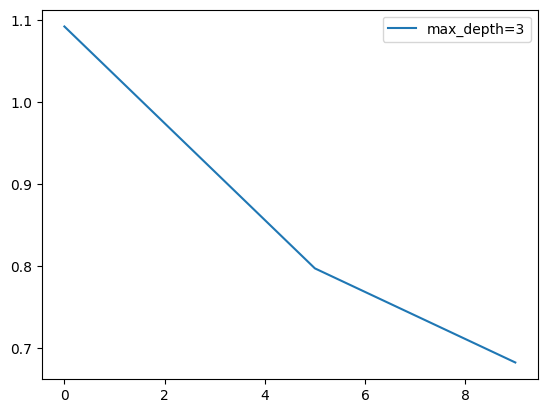

In [99]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

In [124]:
# min_child_weight
scores = {}

In [125]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [126]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

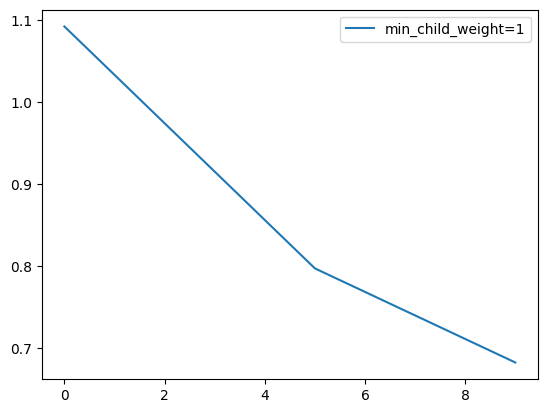

In [127]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

#plt.ylim(0.82, 0.84)
plt.legend()

In [184]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=100, 
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:1.09611	val-rmse:1.09255
[5]	train-rmse:0.80135	val-rmse:0.79739
[10]	train-rmse:0.66856	val-rmse:0.66448
[15]	train-rmse:0.61546	val-rmse:0.61151
[20]	train-rmse:0.59576	val-rmse:0.59204
[25]	train-rmse:0.58865	val-rmse:0.58515
[30]	train-rmse:0.58611	val-rmse:0.58277
[35]	train-rmse:0.58512	val-rmse:0.58195
[40]	train-rmse:0.58472	val-rmse:0.58168
[45]	train-rmse:0.58449	val-rmse:0.58166
[50]	train-rmse:0.58436	val-rmse:0.58165
[55]	train-rmse:0.58423	val-rmse:0.58166
[60]	train-rmse:0.58411	val-rmse:0.58167
[65]	train-rmse:0.58400	val-rmse:0.58172
[70]	train-rmse:0.58386	val-rmse:0.58177
[75]	train-rmse:0.58375	val-rmse:0.58179
[80]	train-rmse:0.58364	val-rmse:0.58181
[85]	train-rmse:0.58356	val-rmse:0.58184
[90]	train-rmse:0.58347	val-rmse:0.58186
[95]	train-rmse:0.58336	val-rmse:0.58189
[99]	train-rmse:0.58329	val-rmse:0.58188


In [185]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

0.581879807543697

# Training the final model - RandomForest

In [235]:
df_full_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature_°c,season,household_size,hour,minute,day_of_week,day,month,is_weekend
78689,91,Heater,2.46,34.5,Summer,4,2,26,6,23,7,1
76423,24,Air Conditioning,4.72,21.5,Fall,4,9,41,0,20,11,0
86945,495,Lights,0.64,-9.2,Spring,2,12,14,1,4,4,0
57427,484,Dishwasher,0.22,34.4,Fall,5,9,47,3,30,11,0
34616,200,Dishwasher,1.80,-5.4,Spring,3,1,2,0,1,5,0


In [236]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train["energy_consumption_kwh"].values

In [237]:
del df_full_train["energy_consumption_kwh"]

In [238]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [241]:
rf = RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=1, 
        n_jobs=-1)

rf.fit(X_full_train, y_full_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at

In [243]:
y_pred = rf.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.5807975570735531

# Save model

In [244]:
import pickle
# from sklearn.pipeline import make_pipeline

In [264]:
model_path = "./models/model.bin"

with open(model_path, "wb") as f_out:
    pickle.dump((dv, rf), f_out)

# Test model

In [287]:
household = df.iloc[50][categorical + numerical]
household

appliance_type            Air Conditioning
season                              Spring
outdoor_temperature_°c                17.4
household_size                           4
hour                                     5
day_of_week                              0
day                                     17
month                                    4
is_weekend                               0
Name: 50, dtype: object

In [288]:
y_household_actual = df.iloc[10].energy_consumption_kwh
y_household_actual

np.float64(0.64)

In [290]:
household[categorical + numerical].to_dict()

{'appliance_type': 'Air Conditioning',
 'season': 'Spring',
 'outdoor_temperature_°c': 17.4,
 'household_size': 4,
 'hour': 5,
 'day_of_week': 0,
 'day': 17,
 'month': 4,
 'is_weekend': 0}

In [291]:
household_dict = {'appliance_type': 'Air Conditioning',
                 'season': 'Spring',
                 'outdoor_temperature_°c': 17.4,
                 'household_size': 4,
                 'hour': 5,
                 'day_of_week': 0,
                 'day': 17,
                 'month': 4,
                 'is_weekend': 0}

In [292]:
with open("./models//model.bin", "rb") as f_out:
    dv, rf = pickle.load(f_out)

In [293]:
X_household = dv.transform(household_dict)

y_household_pred = rf.predict(X_household)
y_household_pred

array([3.39584575])